In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error

### The data

In [2]:
df = pd.read_csv("data/data_scaled.csv")
df.head()

,scaled_y,y,scaled_x1,scaled_x2,scaled_x3,scaled_x4,x_2_dumm,x_3_dumm,x_4_dumm,x1
0,-0.053227,139.0000,-0.143087,-0.087855,-0.096478,-0.089952,0,0,0,58.00
1,-0.034211,233.2596,-0.119559,-0.087855,-0.096478,-0.089952,0,0,0,79.34
2,-0.052016,145.0000,-0.105601,-0.087855,-0.096478,-0.089952,0,0,0,92.00
3,-0.057463,118.0000,-0.134267,-0.087855,-0.096478,-0.089952,0,0,0,66.00
4,-0.056051,125.0000,-0.128754,-0.087855,-0.096478,-0.089952,0,0,0,71.00


In [3]:
y = df['scaled_y']
X = df[['scaled_x1', 'x_2_dumm', 'x_3_dumm', 'x_4_dumm']]

In [4]:
X_train, X_test_cross, y_train, y_test_cross = train_test_split(X, y, test_size=0.4, random_state=101)

In [5]:
X_test, X_cross, y_test, y_cross = train_test_split(X_test_cross, y_test_cross, test_size=0.5,random_state=100)

In [6]:
print('y train vector size',  y_train.shape)
print('X train matrix size', X_train.shape)
print('- - * --'*3)
print('y test vector size',  y_test.shape)
print('X test matrix size', X_test.shape)
print('- - * --'*3)
print('y cross vector size',  y_cross.shape)
print('X cross matrix size', X_cross.shape)

y train vector size (5646,)
X train matrix size (5646, 4)
- - * --- - * --- - * --
y test vector size (1882,)
X test matrix size (1882, 4)
- - * --- - * --- - * --
y cross vector size (1882,)
X cross matrix size (1882, 4)


In [7]:
np.array(X_train['scaled_x1'])

array([ 0.06308693, -0.05267933,  0.11821372, ..., -0.11552388,
       -0.08134526, -0.13867713])

In [8]:
np.array(y_train)

array([ 0.00346063, -0.01933541,  0.05167528, ..., -0.05705984,
       -0.01873021, -0.05336809])

____________________________
# Linear Regression
Using 1 feature only ($y=wx+b$), where $x$ = scaled_x1

#### Training

In [9]:
linear_model = LinearRegression()

In [10]:
linear_model.fit(np.array(X_train['scaled_x1']).reshape(-1,1),
                 y_train)

LinearRegression()

In [11]:
print('intercept: ', linear_model.intercept_, 'coeff: ', linear_model.coef_)

intercept:  -0.00046807267499079794 coeff:  [0.43003871]


## Predictions

In [12]:
yhat = linear_model.predict(np.array(X_test['scaled_x1']).reshape(-1,1))

c:\users\a-gue\onedrive\documentos\python_projects\panama_apt_pricing\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='scaled_y'>

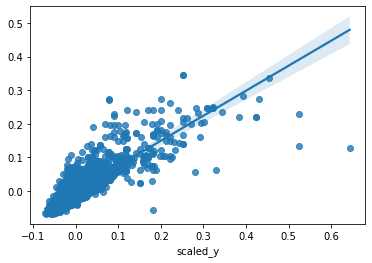

In [13]:
sns.regplot(y_test, yhat) # Predcition vs Observations

In [14]:
mse = mean_squared_error(y_test, yhat)
print('MSE: {}'.format(mse))

MSE: 0.0013244814554887164


_____________

## Polynomial Regression

In [21]:
def get_optim_poly_degree(deg_, X_train, y_train, X_test, y_test, X_cross, y_cross): 
    # define list of error
    test_error = []
    # cv error
    cv_error = []
    # training error
    train_error = []
    
    deg_ = list(range(2,deg_ + 1))
    
    for i in deg_:
        # define features according to he degree of the polynomial
        poly = PolynomialFeatures(degree=i, include_bias=False)
        # import pdb; pdb.set_trace()
        # Get transofrmation of features according to the degree of the polynomial
        X_poly_features = poly.fit_transform(np.array(X_train['scaled_x1']).reshape(-1,1))
        
        # instantiate the class lin reg
        polynomial_model = LinearRegression()
        # train/fit polynomial regression
        polynomial_model.fit(X_poly_features, y_train)

        
        
        X_test_r = poly.fit_transform(np.array(X_test['scaled_x1']).reshape(-1,1))
        X_cross_r = poly.fit_transform(np.array(X_cross['scaled_x1']).reshape(-1,1))
        
        yhat_test = polynomial_model.predict(X_test_r)
        yhat_cross = polynomial_model.predict(X_cross_r)
        yhat_train = polynomial_model.predict(X_poly_features)
        # print('intercept: ', polynomial_model.intercept_, 'coeff: ', polynomial_model.coef_)

        # get mse
        mse_test = mean_squared_error(y_test, yhat_test)
        mse_cross = mean_squared_error(y_cross, yhat_cross)
        mse_train = mean_squared_error(y_train, yhat_train)
        # print('Degree {} -> MSE: {}'.format(i, mse_test))
        
        test_error.append(mse_test)
        cv_error.append(mse_cross)
        train_error.append(mse_train)
    # print(deg_, '\n', test_error, '\n', cv_error)
    plt.plot(deg_, test_error, label='Test Error')
    plt.plot(deg_, cv_error, label = 'Cross Validation Error')
    plt.plot(deg_, train_error, label = 'Train Error')
    plt.tight_layout()
    plt.legend(loc='upper center')
           

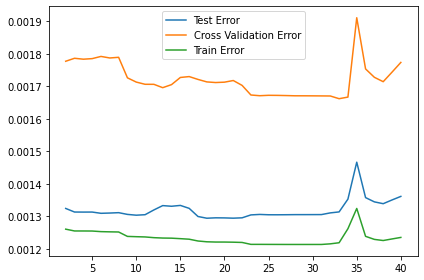

In [22]:
get_optim_poly_degree(40, X_train, y_train, X_test, y_test, X_cross, y_cross)